In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

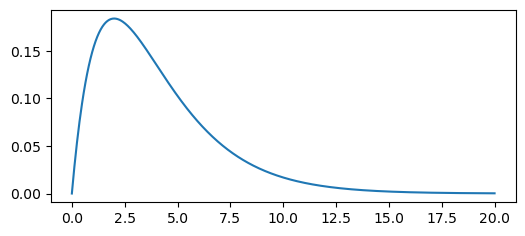

In [5]:
#plot Chi-square distribution with 4 degrees of freedom

plt.plot(x, chi2.pdf(x, df=4))
plt.show()

In [11]:
from scipy.special import gamma

def chi_square_pdf(x, df):
    """
    Calculate the PDF of the Chi-square distribution for a given x value and degrees of freedom (df).
    
    Parameters:
    x (float): The value at which to evaluate the PDF.
    df (int): The degrees of freedom of the Chi-square distribution.
    
    Returns:
    float: The PDF value.
    """
    # Ensure x is non-negative (Chi-square PDF is only defined for x >= 0)
    if x < 0:
        return 0
    
    # Calculate the PDF using the formula
    coefficient = 1 / (2 ** (df / 2) * gamma(df / 2))
    pdf_value = coefficient * (x ** ((df / 2) - 1)) * np.exp(-x / 2)
    
    return pdf_value

In [125]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.linspace(0, 20, 500)

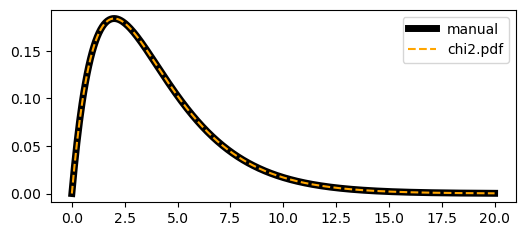

In [126]:
by_hand_chi = [chi_square_pdf(x_, df=4) for x_ in x]
plt.figure(figsize=(6,2.5))
plt.plot(x, by_hand_chi,color='black',label='manual',lw=5)
plt.plot(x, chi2.pdf(x, df=4),color='orange',label='chi2.pdf',ls='--')
plt.legend()

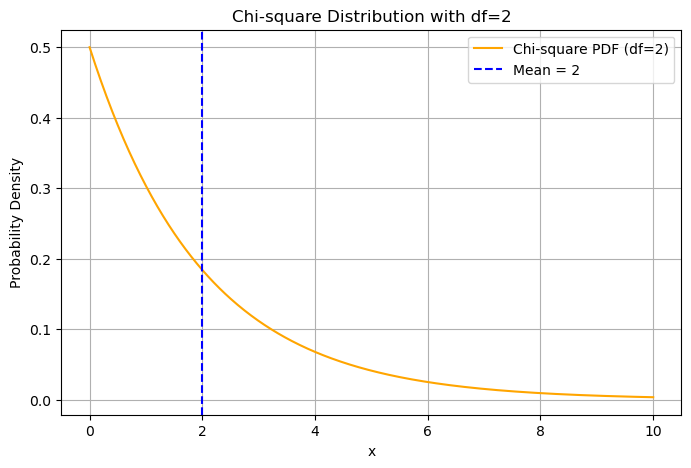

In [167]:
## Average expected value of a chi square distribution is equal to its degrees of freedom

df = 2

# Generate x values
x = np.linspace(0, 10, 500)  # Choose a range that shows the shape of the distribution

# Calculate the PDF of the Chi-square distribution
pdf_values = chi2.pdf(x, df)

# Plot the PDF
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_values, color='orange', label=f'Chi-square PDF (df={df})')

# Add a vertical line at the mean of the distribution
mean_value = df
plt.axvline(mean_value, color='blue', linestyle='--', label=f'Mean = {mean_value}')

# Add labels, title, and legend
plt.title(f'Chi-square Distribution with df={df}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

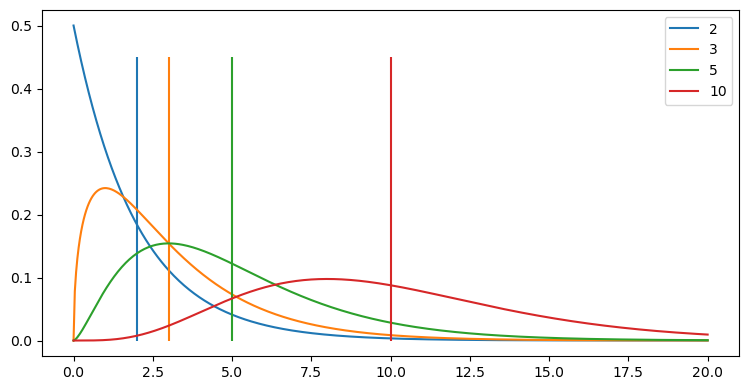

In [131]:
plt.figure(figsize=(9,4.5))
for i, df in enumerate([2,3,5,10]):
    by_hand_chi = [chi_square_pdf(x_, df=df) for x_ in x]
    plt.plot(x, by_hand_chi,color=sns.color_palette()[i],label=f'{df}',)
    plt.vlines(df,0,.45,color=sns.color_palette()[i])
plt.legend()
plt.show()

/var/folders/4m/7mpb_q5j65zdcnwbryv2_f8h0000gn/T/ipykernel_55706/2022205578.py:20: RuntimeWarning: divide by zero encountered in scalar power
  pdf_value = coefficient * (x ** ((df / 2) - 1)) * np.exp(-x / 2)


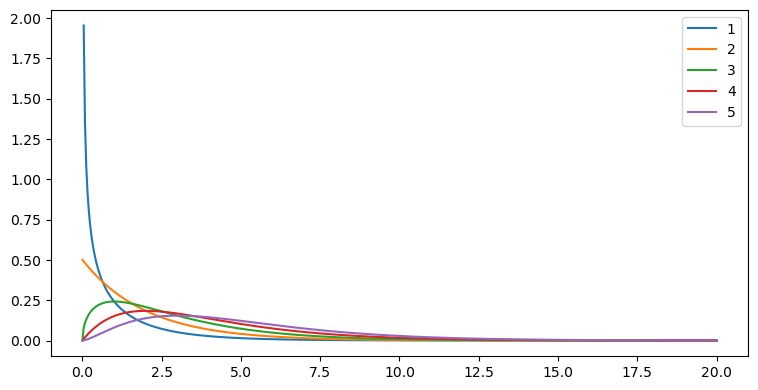

In [37]:
plt.figure(figsize=(9,4.5))
for i, df in enumerate([1,2,3,4,5]):
    by_hand_chi = [chi_square_pdf(x_, df=df) for x_ in x]
    plt.plot(x, by_hand_chi, color=sns.color_palette()[i],label=f'{df}',)
plt.legend()
plt.show()

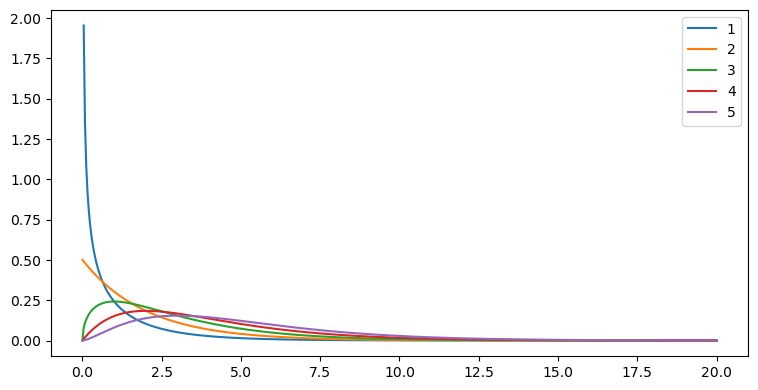

In [38]:
plt.figure(figsize=(9,4.5))
for i, df in enumerate([1,2,3,4,5]):
    plt.plot(x, chi2.pdf(x, df=df),color=sns.color_palette()[i],label=f'{df}',)
plt.legend()
plt.show()

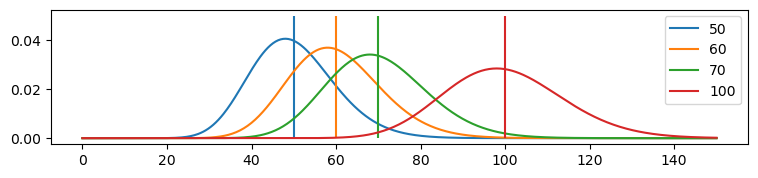

In [55]:
x = np.linspace(0, 150, 500)

plt.figure(figsize=(9,1.75))
for i, df in enumerate([50,60,70,100]):
    by_hand_chi = [chi_square_pdf(x_, df=df) for x_ in x]
    plt.plot(x, by_hand_chi, color=sns.color_palette()[i],label=f'{df}',)
    plt.vlines(df,0,.05,color=sns.color_palette()[i])
plt.legend()
plt.show()

/var/folders/4m/7mpb_q5j65zdcnwbryv2_f8h0000gn/T/ipykernel_55706/2022205578.py:20: RuntimeWarning: overflow encountered in scalar power
  pdf_value = coefficient * (x ** ((df / 2) - 1)) * np.exp(-x / 2)
/var/folders/4m/7mpb_q5j65zdcnwbryv2_f8h0000gn/T/ipykernel_55706/2022205578.py:20: RuntimeWarning: invalid value encountered in scalar multiply
  pdf_value = coefficient * (x ** ((df / 2) - 1)) * np.exp(-x / 2)


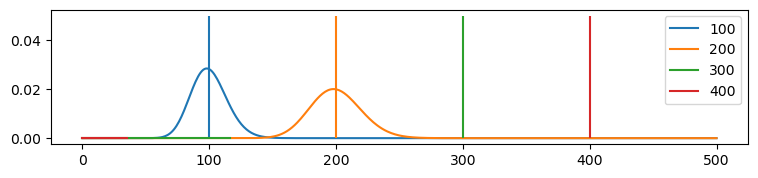

In [70]:
x = np.linspace(0, 500, 500)

plt.figure(figsize=(9,1.75))
for i, df in enumerate([100,200,300,400]):
    by_hand_chi = [chi_square_pdf(x_, df=df) for x_ in x]
    plt.plot(x, by_hand_chi, color=sns.color_palette()[i],label=f'{df}',)
    plt.vlines(df,0,.05,color=sns.color_palette()[i])
plt.legend()
plt.show()

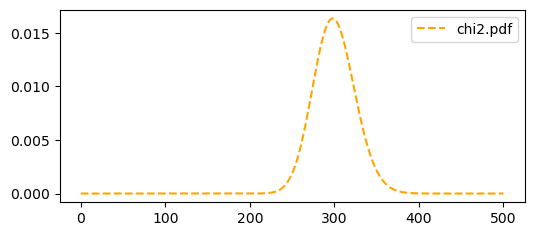

In [72]:
plt.figure(figsize=(6,2.5))
plt.plot(x, chi2.pdf(x, df=300),color='orange',label='chi2.pdf',ls='--')
plt.legend()

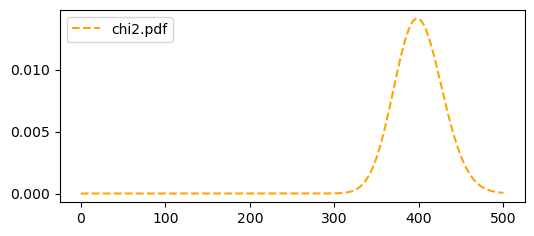

In [73]:
plt.figure(figsize=(6,2.5))
plt.plot(x, chi2.pdf(x, df=400),color='orange',label='chi2.pdf',ls='--')
plt.legend()

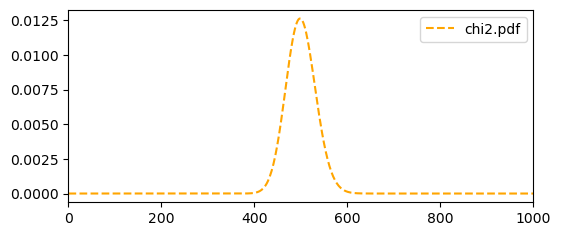

In [168]:
x = np.linspace(0, 1000, 500)
plt.figure(figsize=(6,2.5))
plt.plot(x, chi2.pdf(x, df=500),color='orange',label='chi2.pdf',ls='--')
plt.xlim(0,1000)
plt.legend()

#### chi and z distribution

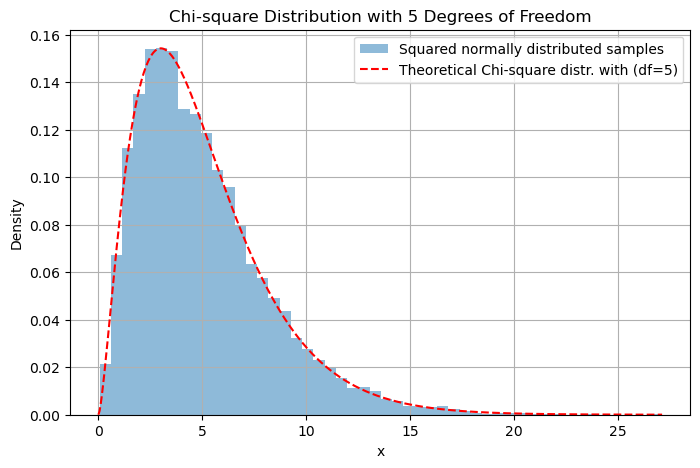

In [181]:
from scipy.stats import norm, chi2

# Number of degrees of freedom (k)
k = 5  # You can change this value to see different effects

# Number of samples to generate
n_samples = 10000

# Generate k independent standard normal random variables
normal_samples = np.random.normal(0, 1, (n_samples, k))

# Square each of the k normal variables
squared_samples = normal_samples ** 2

# Sum the squared variables along the second axis (for each sample)
chi_square_samples = np.sum(squared_samples, axis=1)

# Plot the histogram of the resulting Chi-square distributed variable
plt.figure(figsize=(8, 5))
plt.hist(chi_square_samples, bins=50, density=True, alpha=0.5, label='Squared normally distributed samples')

# Plot the theoretical Chi-square distribution for comparison
x = np.linspace(0, np.max(chi_square_samples), 500)
plt.plot(x, chi2.pdf(x, df=k), 'r--', label=f'Theoretical Chi-square distr. with (df={k})')

plt.title(f'Chi-square Distribution with {k} Degrees of Freedom')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [186]:
import math

In [230]:
for n in np.random.choice(100,20):
    if n > 0:
        print(n, np.isclose(float(math.factorial(n-1)) , gamma(n) ))

62 True
57 True
8 True
43 True
16 True
94 True
97 True
27 True
1 True
68 True
17 True
65 True
89 True
68 True
69 True
69 True
4 True
98 True
11 True
15 True


In [232]:
gamma(2.5), math.factorial(2.5)

TypeError: 'float' object cannot be interpreted as an integer